<ipython-input-5-a2590b1ed9ac>:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor=color))


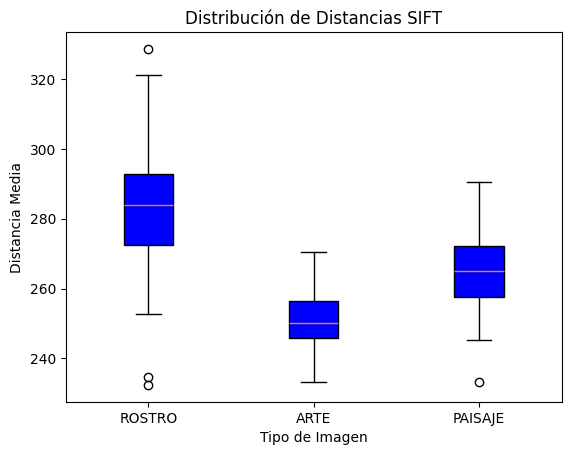

<ipython-input-5-a2590b1ed9ac>:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor=color))


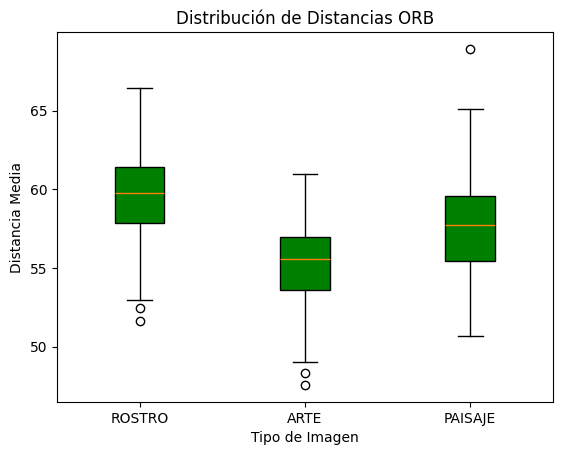

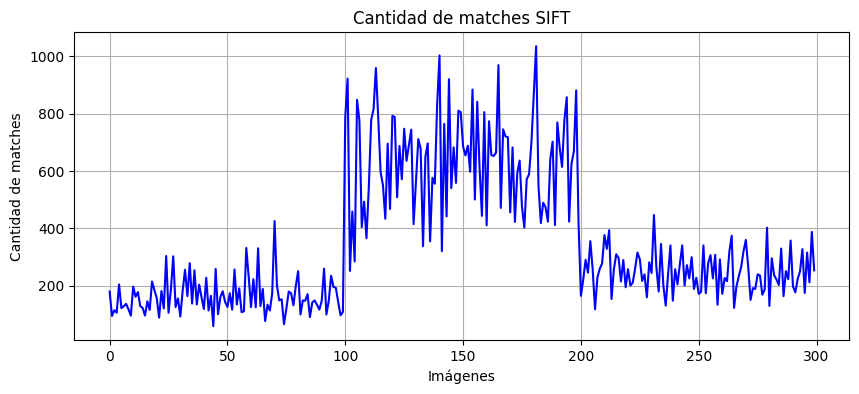

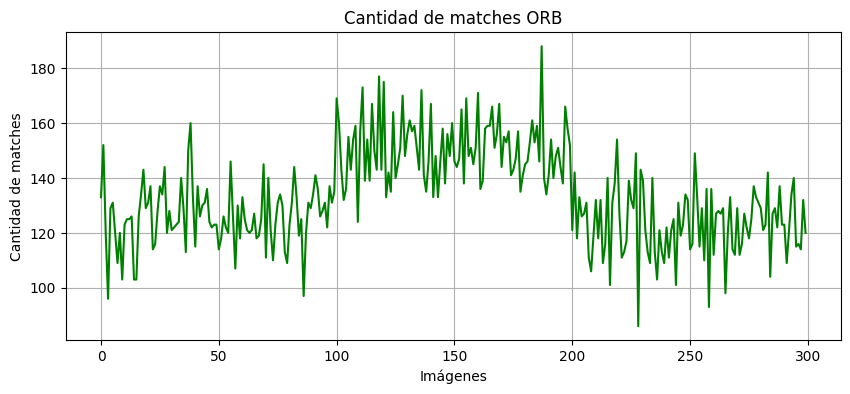


Estadísticas SIFT:
Coincidencias mínimas: 58
Coincidencias máximas: 1035
Coincidencias promedio: 347.57666666666665
Desviación estándar de coincidencias: 204.88112168333672
Tiempo promedio de extracción de características: 0.13615982055664064 s
Desviación estándar de tiempo: 0.035469645899159595 s
Características mínimas: 200
Características máximas: 200
Características promedio: 200.0
Desviación estándar de características: 0.0
Distancia mínima: 232.37315530215992
Desviación estándar de distancia mínima: 17.60277499299613
Distancia máxima: 328.69239887438323
Desviación estándar de distancia máxima: 17.60277499299613
Distancia promedio: 266.14448957411844
Desviación estándar de distancia promedio: 17.60277499299613

Estadísticas ORB:
Coincidencias mínimas: 86
Coincidencias máximas: 188
Coincidencias promedio: 133.31333333333333
Desviación estándar de coincidencias: 12.447340635207544
Tiempo promedio de extracción de características: 0.009868136644363404 s
Desviación estándar de tiempo

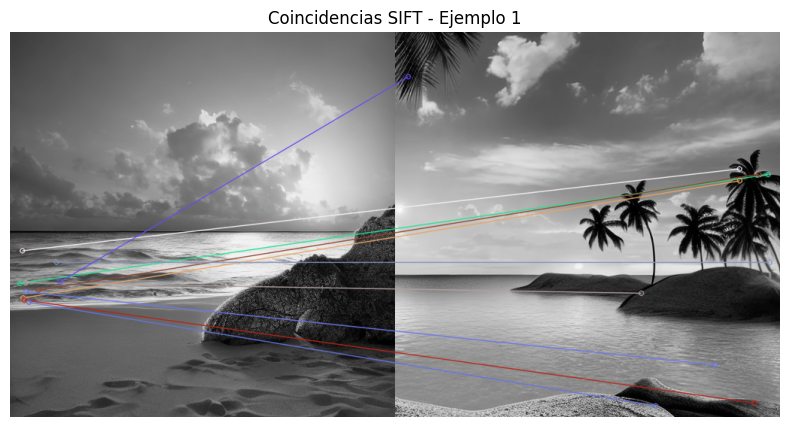

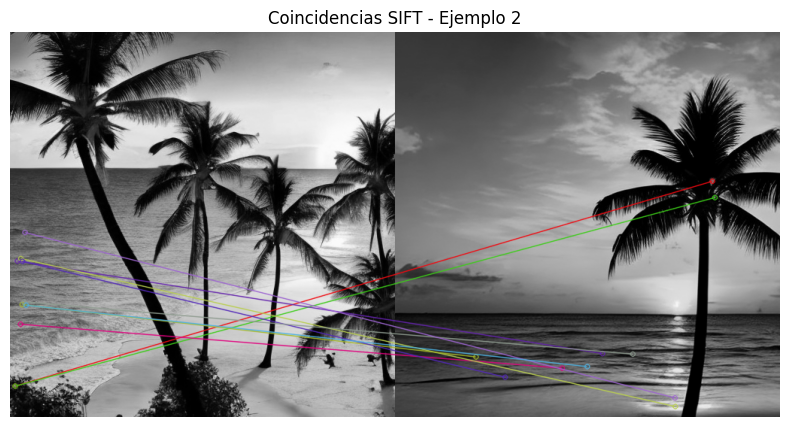

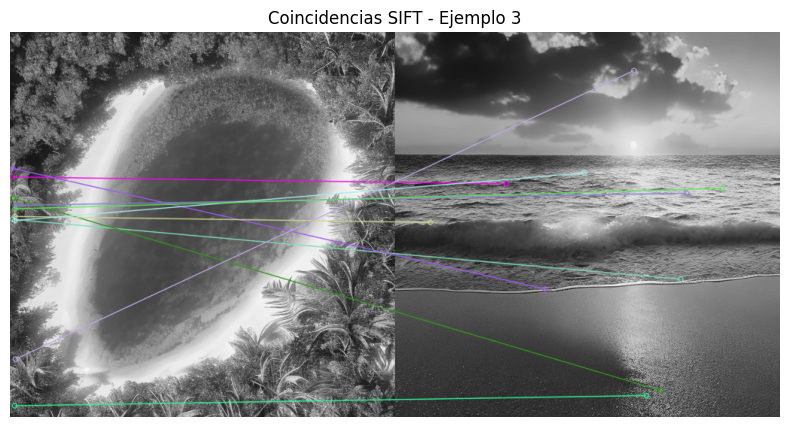

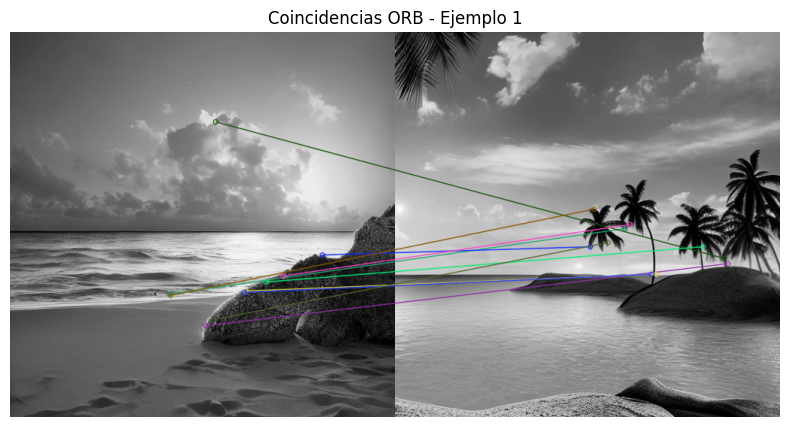

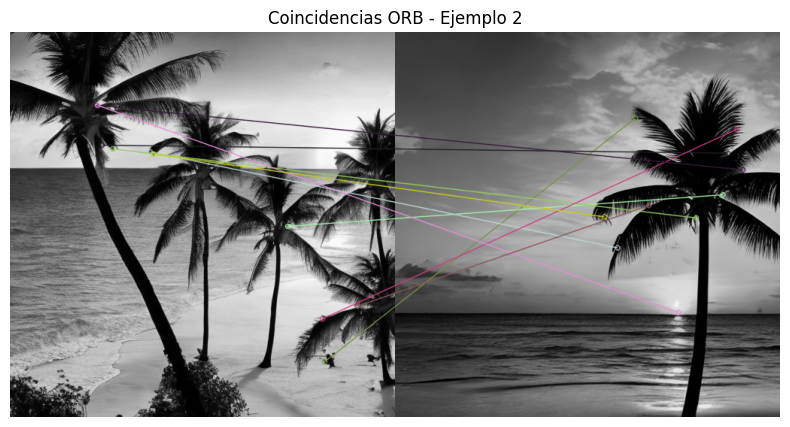

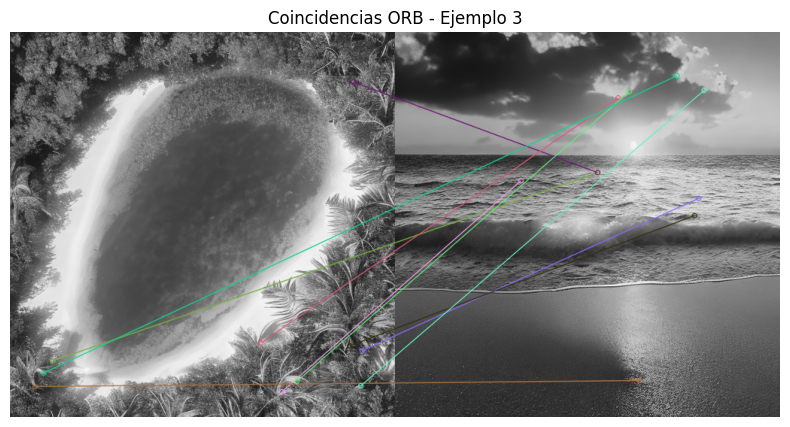

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

def extract_features_sift_orb(images):
    sift = cv2.SIFT_create()
    orb = cv2.ORB_create()
    descriptors_sift = []
    descriptors_orb = []
    keypoints_sift = []
    keypoints_orb = []
    times_sift = []
    times_orb = []

    for img in images:
        start_time = time.time()
        kp_sift, des_sift = sift.detectAndCompute(img, None)
        keypoints_sift.append(kp_sift)
        times_sift.append(time.time() - start_time)

        start_time = time.time()
        kp_orb, des_orb = orb.detectAndCompute(img, None)
        keypoints_orb.append(kp_orb)
        times_orb.append(time.time() - start_time)

        descriptors_sift.append(des_sift)
        descriptors_orb.append(des_orb)

    return descriptors_sift, descriptors_orb, keypoints_sift, keypoints_orb, np.mean(times_sift), np.mean(times_orb)

def compute_distances(descriptors1, descriptors2, method='euclidean'):
    distances = []
    num_matches = []
    all_matches = []
    for des1, des2 in zip(descriptors1, descriptors2):
        if des1 is None or des2 is None:
            distances.append(np.nan)
            num_matches.append(0)
            all_matches.append([])  # No hay coincidencias
            continue

        bf = cv2.BFMatcher(cv2.NORM_L2 if method == 'euclidean' else cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des1, des2)

        if len(matches) == 0:
            distances.append(np.nan)
            num_matches.append(0)
            all_matches.append([])  # No hay coincidencias
        else:
            match_distances = [m.distance for m in matches]
            dist = np.mean(match_distances)
            distances.append(dist)
            num_matches.append(len(matches))
            all_matches.append(matches[:10])  # Tomar solo los 10 primeros matches para visualización

    return distances, num_matches, all_matches

def plot_boxplot(data, labels, title, ylabel, color):
    plt.figure()
    plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor=color))
    plt.xlabel('Tipo de Imagen')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def show_matches(images_esp, images_eng, matches, keypoints_esp, keypoints_eng, title):
    for i in range(min(3, len(images_esp), len(images_eng))):  # Mostrar hasta 3 ejemplos
        if not matches[i]:  # Verificar si no hay coincidencias
            continue
        img_matches = cv2.drawMatches(images_esp[i], keypoints_esp[i], images_eng[i], keypoints_eng[i], matches[i], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.figure(figsize=(10, 5))
        plt.imshow(img_matches)
        plt.title(f'{title} - Ejemplo {i+1}')
        plt.axis('off')
        plt.show()

def plot_line_chart(data, title, ylabel, color):
    plt.figure(figsize=(10, 4))
    combined_data = [item for sublist in data for item in sublist]  # Combinar todos los datos en una lista
    plt.plot(range(len(combined_data)), combined_data, color=color)
    plt.xlabel('Imágenes')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Directorios de imágenes
dirs_esp = ['ESP_ROSTRO', 'ESP_ARTE', 'ESP_PAISAJE']
dirs_eng = ['ENG_ROSTRO', 'ENG_ARTE', 'ENG_PAISAJE']

sift_distances = []
orb_distances = []
sift_matches = []
orb_matches = []
sift_times = []
orb_times = []
sift_keypoints = []
orb_keypoints = []
labels = []

for dir_esp, dir_eng in zip(dirs_esp, dirs_eng):
    images_esp = load_images_from_folder(dir_esp)
    images_eng = load_images_from_folder(dir_eng)

    des_sift_esp, des_orb_esp, kp_sift_esp, kp_orb_esp, time_sift_esp, time_orb_esp = extract_features_sift_orb(images_esp)
    des_sift_eng, des_orb_eng, kp_sift_eng, kp_orb_eng, time_sift_eng, time_orb_eng = extract_features_sift_orb(images_eng)

    dist_sift, matches_sift, match_sift_all = compute_distances(des_sift_esp, des_sift_eng, method='euclidean')
    dist_orb, matches_orb, match_orb_all = compute_distances(des_orb_esp, des_orb_eng, method='hamming')

    sift_distances.append(dist_sift)
    orb_distances.append(dist_orb)
    sift_matches.append(matches_sift)
    orb_matches.append(matches_orb)
    sift_times.append((time_sift_esp + time_sift_eng) / 2)
    orb_times.append((time_orb_esp + time_orb_eng) / 2)
    sift_keypoints.append(kp_sift_esp + kp_sift_eng)
    orb_keypoints.append(kp_orb_esp + kp_orb_eng)
    labels.append(dir_esp.split('_')[1])

# Graficar boxplot de distancias SIFT y ORB
plot_boxplot(sift_distances, labels, 'Distribución de Distancias SIFT', 'Distancia Media', 'blue')
plot_boxplot(orb_distances, labels, 'Distribución de Distancias ORB', 'Distancia Media', 'green')

# Graficar cantidad de matches por imagen en cada categoría
plot_line_chart(sift_matches, 'Cantidad de matches SIFT', 'Cantidad de matches', 'blue')
plot_line_chart(orb_matches, 'Cantidad de matches ORB', 'Cantidad de matches', 'green')

# Mostrar estadísticas adicionales
print("\nEstadísticas SIFT:")
print(f"Coincidencias mínimas: {min([min(matches) for matches in sift_matches])}")
print(f"Coincidencias máximas: {max([max(matches) for matches in sift_matches])}")
print(f"Coincidencias promedio: {np.mean([np.mean(matches) for matches in sift_matches])}")
print(f"Desviación estándar de coincidencias: {np.std([np.mean(matches) for matches in sift_matches])}")
print(f"Tiempo promedio de extracción de características: {np.nanmean(sift_times)} s")
print(f"Desviación estándar de tiempo: {np.std(sift_times)} s")
print(f"Características mínimas: {min([len(kp) for kp in sift_keypoints])}")
print(f"Características máximas: {max([len(kp) for kp in sift_keypoints])}")
print(f"Características promedio: {np.mean([len(kp) for kp in sift_keypoints])}")
print(f"Desviación estándar de características: {np.std([len(kp) for kp in sift_keypoints])}")
print(f"Distancia mínima: {np.nanmin(sift_distances)}")
print(f"Desviación estándar de distancia mínima: {np.std(sift_distances)}")
print(f"Distancia máxima: {np.nanmax(sift_distances)}")
print(f"Desviación estándar de distancia máxima: {np.std(sift_distances)}")
print(f"Distancia promedio: {np.nanmean(sift_distances)}")
print(f"Desviación estándar de distancia promedio: {np.std(sift_distances)}")

print("\nEstadísticas ORB:")
print(f"Coincidencias mínimas: {min([min(matches) for matches in orb_matches])}")
print(f"Coincidencias máximas: {max([max(matches) for matches in orb_matches])}")
print(f"Coincidencias promedio: {np.mean([np.mean(matches) for matches in orb_matches])}")
print(f"Desviación estándar de coincidencias: {np.std([np.mean(matches) for matches in orb_matches])}")
print(f"Tiempo promedio de extracción de características: {np.nanmean(orb_times)} s")
print(f"Desviación estándar de tiempo: {np.std(orb_times)} s")
print(f"Características mínimas: {min([len(kp) for kp in orb_keypoints])}")
print(f"Características máximas: {max([len(kp) for kp in orb_keypoints])}")
print(f"Características promedio: {np.mean([len(kp) for kp in orb_keypoints])}")
print(f"Desviación estándar de características: {np.std([len(kp) for kp in orb_keypoints])}")
print(f"Distancia mínima: {np.nanmin(orb_distances)}")
print(f"Desviación estándar de distancia mínima: {np.std(orb_distances)}")
print(f"Distancia máxima: {np.nanmax(orb_distances)}")
print(f"Desviación estándar de distancia máxima: {np.std(orb_distances)}")
print(f"Distancia promedio: {np.nanmean(orb_distances)}")
print(f"Desviación estándar de distancia promedio: {np.std(orb_distances)}")

# Mostrar coincidencias de ejemplo
show_matches(images_esp, images_eng, match_sift_all, kp_sift_esp, kp_sift_eng, "Coincidencias SIFT")
show_matches(images_esp, images_eng, match_orb_all, kp_orb_esp, kp_orb_eng, "Coincidencias ORB")
